In [ ]:
from astrodb_utils import load_astrodb, AstroDBError
#from simple.utils.spectra import check_spectrum_plottable
from astrodb_utils.fits import add_missing_keywords, add_wavelength_keywords, check_header
from astropy.io import fits
import astropy.units as u
import os
import numpy as np
from specutils import Spectrum, SpectralRegion
from specutils.manipulation import extract_region, snr_threshold
from astropy.wcs import WCS
import matplotlib.pyplot as plt

INFO     - astrodb_utils.publications - logger.parent.name: astrodb_utils, logger.parent.level: 20


In [2]:
path = "/Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files"
print(os.path.exists(os.path.join(path,"SDSS_J134749.74+333601.7_sdL0_SDSS_Primeval-I.txt")))


True


In [37]:
file_path = os.path.join(path, "SDSS_J010448.46+153501.8_usdL1.5_Xshooter_VIS_Primeval-II.fits")
with fits.open(file_path, mode="update") as hdul:
    header=  hdul[0].header
    #header.remove("CRDER2", ignore_missing=True)
    #header.remove("CSYER2", ignore_missing=True) 
    #header.remove("CUNIT2", ignore_missing=True)
    #header.remove("HDUCLAS2", ignore_missing=True)
    w = WCS(header)
    
print(f"WCS: {w}")
print(hdul[0].header["NAXIS"])
#print(f"header: {header}")
#spectrum = Spectrum.read(file_path)
#print(f"spectrum flux units: {spectrum.flux.unit}")
#print(f"spectrum spectral axis units: {spectrum.spectral_axis.unit}")

WCS: WCS Keywords

Number of WCS axes: 2
CTYPE : 'LINEAR' '' 
CRVAL : 533.65885533784 0.0 
CRPIX : -1316.02868326581 0.0 
CD1_1 CD1_2  : 0.0200004335492849 0.0 
CD2_1 CD2_2  : 0.0 1.0 
NAXIS : 22993  0
1


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [72]:
filepath = os.path.join(path, "SDSS_J010448.46+153501.8_usdL1.5_Xshooter_VIS_Primeval-II.fits")
hdul= fits.open(filepath, mode="update")
hdul.verify("fix")
header=  hdul[0].header
wcs = WCS(header)
wcs = wcs.dropaxis(1)  # Drop the second axis (index 1)
print(wcs.naxis)
print(wcs.printwcs())
print(wcs.pixel_n_dim)
print(wcs.world_n_dim)
print(hdul[0].header["NAXIS"])
print(hdul[0].header["WCSDIM"])
print(header["RADECSYS"])
hdul.close()

1
WCS Keywords

Number of WCS axes: 1
CTYPE : 'LINEAR' 
CRVAL : 533.65885533784 
CRPIX : -1316.02868326581 
CD1_1  : 0.0200004335492849 
NAXIS : 22993
None
1
1
1
1
FK5


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]



 Reading FITS file: ULAS_J021642.96+004005.7_sdL4_Xshooter_VIS_Primeval-I.fits
BUNIT keyword not found, set to 'erg / (cm2 s Angstrom)'
RADECSYS keyword not found, no changes made.
flux unit:  wavelength unit: Angstrom
ERROR    - astrodb_utils.spectra - flux units are not expected: . Expecting [PhysicalType({'power density', 'spectral flux density wav'}), PhysicalType('spectral flux density')].
Could not read ULAS_J021642.96+004005.7_sdL4_Xshooter_VIS_Primeval-I.fits: flux units are not expected: . Expecting [PhysicalType({'power density', 'spectral flux density wav'}), PhysicalType('spectral flux density')].

 Reading FITS file: ULAS_J223302.03+062030.8_esdL0.5_Xshooter_VIS_Primeval-IV.fits
BUNIT keyword found and extra / removed, set to 'erg / (cm2 s Angstrom)'
RADECSYS keyword found and renamed to RADESYSa with value: FK5
flux unit: erg / (Angstrom s cm2) wavelength unit: nm
File ULAS_J223302.03+062030.8_esdL0.5_Xshooter_VIS_Primeval-IV.fits is plottable.

 Reading FITS file: ULAS_

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


flux unit: erg / (Angstrom s cm2) wavelength unit: nm
File ULAS_J230711.01+014447.1_usdL4.5_Xshooter_VIS_Primeval-III.fits is plottable.

 Reading FITS file: 2MASS_J06164006-6407194_esdL6_Xshooter_VIS_Primeval-I.fits


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


BUNIT keyword found and extra / removed, set to 'erg / (cm2 s Angstrom)'
RADECSYS keyword found and renamed to RADESYSa with value: FK5
flux unit: erg / (Angstrom s cm2) wavelength unit: nm
File 2MASS_J06164006-6407194_esdL6_Xshooter_VIS_Primeval-I.fits is plottable.

 Reading FITS file: SDSS_J010448.46+153501.8_usdL1.5_Xshooter_VIS_Primeval-II.fits


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Detected 2D WCS with 1D data, removing unnecessary WCS keywords.
Original WCS: WCS Keywords

Number of WCS axes: 2
CTYPE : 'LINEAR' '' 
CRVAL : 533.65885533784 0.0 
CRPIX : -1316.02868326581 0.0 
CD1_1 CD1_2  : 0.0200004335492849 0.0 
CD2_1 CD2_2  : 0.0 1.0 
NAXIS : 22993  0
WCSDIM: 1
Removed unnecessary WCS keywords for 2D or 3D data.
Updated WCS: WCS Keywords

Number of WCS axes: 2
CTYPE : 'LINEAR' '' 
CRVAL : 533.65885533784 0.0 
CRPIX : -1316.02868326581 0.0 
CD1_1 CD1_2  : 0.0200004335492849 0.0 
CD2_1 CD2_2  : 0.0 1.0 
NAXIS : 22993  0
BUNIT keyword found and extra / removed, set to 'erg / (cm2 s Angstrom)'
DC-FLAG keyword not found, set to 0
RADECSYS keyword found and renamed to RADESYSa with value: FK5
Could not read SDSS_J010448.46+153501.8_usdL1.5_Xshooter_VIS_Primeval-II.fits: spec_axis does not have unit: <class 'list'> []

 Reading FITS file: ULAS_J141203.85+121609.9_sdL5_Xshooter_VIS_Primeval-IV.fits
BUNIT keyword found and extra / removed, set to 'erg / (cm2 s Angstrom)'

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Could not read ULAS_J151913.03-000030.0_sdL4_Xshooter_VIS_Primeval-I.fits: flux units are not expected: . Expecting [PhysicalType({'power density', 'spectral flux density wav'}), PhysicalType('spectral flux density')].

 Reading FITS file: ULAS_J130710.22+151103.4_sdL8_Xshooter_VIS_Primeval-IV.fits.fits
Detected 2D WCS with 1D data, removing unnecessary WCS keywords.
Original WCS: WCS Keywords

Number of WCS axes: 2
CTYPE : 'LINEAR' '' 
CRVAL : 533.660000320511 0.0 
CRPIX : -716.000000000667 0.0 
CD1_1 CD1_2  : 0.0199999995529652 0.0 
CD2_1 CD2_2  : 0.0 1.0 
NAXIS : 23601  0
WCSDIM: 1
Removed unnecessary WCS keywords for 2D or 3D data.
Updated WCS: WCS Keywords

Number of WCS axes: 2
CTYPE : 'LINEAR' '' 
CRVAL : 533.660000320511 0.0 
CRPIX : -716.000000000667 0.0 
CD1_1 CD1_2  : 0.0199999995529652 0.0 
CD2_1 CD2_2  : 0.0 1.0 
NAXIS : 23601  0
BUNIT keyword found and extra / removed, set to 'erg / (cm2 s Angstrom)'
DC-FLAG keyword not found, set to 0
RADECSYS keyword found and renamed t

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Could not read ULAS_J130710.22+151103.4_sdL8_Xshooter_VIS_Primeval-IV.fits.fits: spec_axis does not have unit: <class 'list'> []

 Reading FITS file: ULAS_J024035.36+060629.3_sdM7_Xshooter_VIS_Primevl-IV.fits
BUNIT keyword found and extra / removed, set to 'erg / (cm2 s Angstrom)'
RADECSYS keyword found and renamed to RADESYSa with value: FK5


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/Users/kelle/miniforge3/envs/simple_3.13/lib/python3.13/site-packages/specutils/io/default_loaders/wcs_fits.py:522: UserWarning: linear Solution: Try using `format='wcs1d-fits'` instead
  warnings.warn("linear Solution: Try using `format='wcs1d-fits'` instead")


flux unit: erg / (Angstrom s cm2) wavelength unit: nm
File ULAS_J024035.36+060629.3_sdM7_Xshooter_VIS_Primevl-IV.fits is plottable.

 Reading FITS file: ULAS_J135058.85+081506.8_usdL3_Xshooter_VIS_Primeval-III.fits
BUNIT keyword found and extra / removed, set to 'erg / (cm2 s Angstrom)'
DC-FLAG keyword not found, set to 0
RADECSYS keyword found and renamed to RADESYSa with value: FK5
Could not read ULAS_J135058.85+081506.8_usdL3_Xshooter_VIS_Primeval-III.fits: "Keyword 'DC-FLAG' not found."

 Reading FITS file: ULAS_J020858.62+020657.0_esdL3_Xshooter_VIS_Primeval-III.fits
BUNIT keyword found and extra / removed, set to 'erg / (cm2 s Angstrom)'
DC-FLAG keyword not found, set to 0
RADECSYS keyword found and renamed to RADESYSa with value: FK5
Could not read ULAS_J020858.62+020657.0_esdL3_Xshooter_VIS_Primeval-III.fits: "Keyword 'DC-FLAG' not found."

 Reading FITS file: ULAS_J233227.03+123452.0_L6p+T4p_Xshooter_VIS_Primeval-IV.fits
BUNIT keyword found and extra / removed, set to 'erg / (

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


READING FITS file: ULAS_J231949.36+044559.5_M7_comb_OSIRIS_scombine_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J231949.36+044559.5_M7_comb_OSIRIS_scombine_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wavelenth range: 5403.447981095367 Angstrom - 10195.708446603123 Angstrom
PLOTTABLE file name: ULAS_J231949.36+044559.5_M7_comb_OSIRIS_scombine_Primeval-IV.fits 

READING FITS file: ULAS_J010756.85+100811.3_sdM7_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J010756.85+100811.3_sdM7_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wavelenth range: 5400.000009536744 Angstrom - 10195.122075080872 Angstrom
P

flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wavelenth range: 5404.498589515689 Angstrom - 10199.999939918522 Angstrom
PLOTTABLE file name: ULAS_J125938.50+301500.2_M9_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J111429.54+072809.5_esdL0_OSIRIS_GTC39-12B_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J111429.54+072809.5_esdL0_OSIRIS_GTC39-12B_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wavelenth range: 5400.000009536748 Angstrom - 10195.122075080875 Angstrom
PLOTTABLE file name: ULAS_J111429.54+072809.5_esdL0_OSIRIS_GTC39-12B_Primeval-IV.fits 

READING FITS file: ULAS_J135359.58+011856.7_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_su

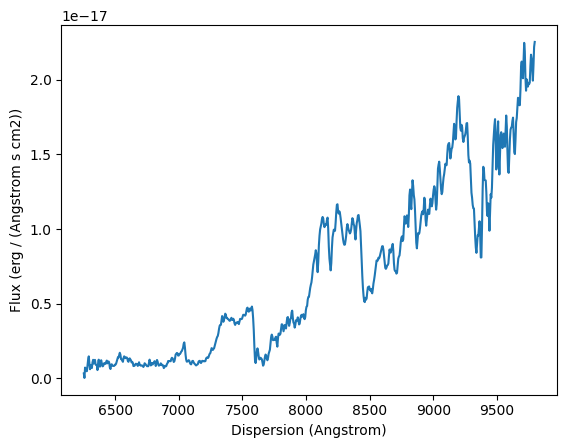

wavelenth range: 6253.0823497772235 Angstrom - 9797.793899536135 Angstrom
READING FITS file: ULAS_J224054.61+030902.0_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J224054.61+030902.0_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wavelenth range: 5404.399250030519 Angstrom - 10150.00008773804 Angstrom
PLOTTABLE file name: ULAS_J224054.61+030902.0_M7_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J231924.35+052524.5_esdL1_comb_OSIRIS_scombine_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J231924.35+052524.5_esdL1_comb_OSIRIS_scombine_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wave

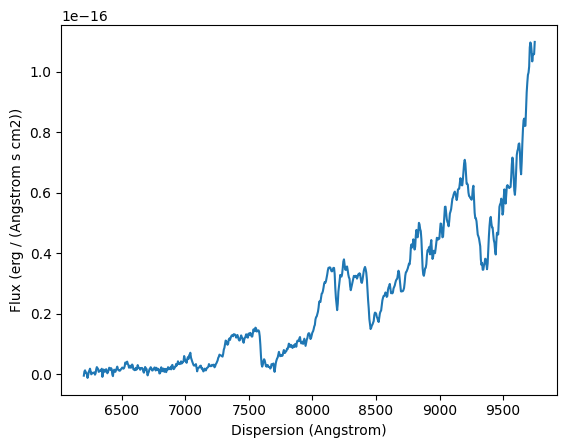

wavelenth range: 6200.678857695102 Angstrom - 9749.27423139616 Angstrom
READING FITS file: ULAS_J134505.85+342441.8_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J134505.85+342441.8_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wavelenth range: 5400.284349441525 Angstrom - 10149.999861717217 Angstrom
PLOTTABLE file name: ULAS_J134505.85+342441.8_M9_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J001837.37+020015.7_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J001837.37+020015.7_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom
wavelenth range: 54

In [21]:
# Only do OSIRIS FITS files

file_read = 0
file_plotted = 0
file_failed = 0

for filename in os.listdir(path):
    if not filename.endswith("fits") or "OSIRIS" not in filename:
        #print(f"SKIPPING FITS file: {filename}")
        continue
    else:
        print(f"READING FITS file: {filename}")
    
    file_path = os.path.join(path, filename)
    print(f"File path: {file_path}")

    # Read the FITS file
    #with fits.open(file_path, mode="update") as filehandle:
    #    unit_string =  "erg / (angstrom s cm2)"
    #    print(f"REPLACING {filehandle[0].header['BUNIT']} with {unit_string}")
    #    filehandle[0].header["BUNIT"] = unit_string

    try:
        spectrum = Spectrum.read(file_path) #format="wcs1d-fits") #, flux_unit=u.Unit("erg / (angstrom s cm2)"))
        spectrum = extract_region(spectrum, SpectralRegion(0.54*u.um, 1.02*u.um))
         
        print(f"flux unit: {spectrum.flux.unit}")
        #if u.get_physical_type(spectrum.flux.unit) == "unknown": 
        #    spectrum.flux = spectrum.flux * u.Unit("erg / (angstrom s cm2)")  # Convert flux to erg/cm^2/s/A
        print(f"flux unit: {u.get_physical_type(spectrum.flux.unit)}, wave unit: {spectrum.spectral_axis.unit}")
        file_read +=1
    except Exception as e:
        file_failed += 1
        raise e

    # Plot and check
    try:
        check_spectrum_plottable(spectrum, raise_error=True, show_plot=False)
        print(f"wavelenth range: {spectrum.spectral_axis.min()} - {spectrum.spectral_axis.max()}")
        print(f"PLOTTABLE file name: {filename} \n")
        file_plotted += 1
    except Exception as e:
        file_failed += 1
        raise e

    if filename == "ULAS_J230443.30+093423.9_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits":
        spectrum = extract_region(spectrum, SpectralRegion(0.625*u.um, 0.98*u.um))
        check_spectrum_plottable(spectrum, raise_error=True, show_plot=True)
        print(f"wavelenth range: {spectrum.spectral_axis.min()} - {spectrum.spectral_axis.max()}")

    if filename == "ULAS_J141832.35+025323.0_sdL0_comb_OSIRIS_scombine_Primeval-IV.fits":
        spectrum = extract_region(spectrum, SpectralRegion(0.62*u.um, 0.975*u.um))
        check_spectrum_plottable(spectrum, raise_error=True, show_plot=True)
        print(f"wavelenth range: {spectrum.spectral_axis.min()} - {spectrum.spectral_axis.max()}")

   

print(f"\nTotal files read into Spectrum objects: {file_read}")
print(f"Total files plotted: {file_plotted}")
print(f"Total files failed: {file_failed}")

#Problems



In [ ]:
path = "/Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/spectra_convert/Zhang18/"
original_path = os.path.join(path, "sty2054_supplemental_files")
out_path = os.path.join(path, "SIMPLE")
filename = "ULAS_J020858.62+020657.0_esdL3_Xshooter_VIS_Primeval-III.fits"
file_path = os.path.join(original_path, filename)
hdul = fits.open(file_path)
header = hdul[0].header





In [46]:
print(header.get("DC-FLAG"))
if header.get("DC-FLAG") is None:  
   print("DC-FLAG keyword not found, setting to 0")
   header["DC-FLAG"] = 0

print(header)

out_filename = filename.replace(".fits", "_SIMPLE.fits")
outfile_path = os.path.join(path, "SIMPLE", out_filename)
fits.writeto(
    outfile_path,
    hdul[0].data,
    header=header,
    overwrite=True,
    output_verify="fix",
)
print(f"File written to: {outfile_path}")
print(fits.getval(outfile_path, "DC-FLAG"))

0
SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    3 / Number of axes                                 NAXIS1  =                23001 / Axis length                                    NAXIS2  =                    1 / Axis length                                    NAXIS3  =                    4 / Axis length                                    EXTEND  =                    T / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        IRAF-TLM= '2018-05-29T13:04:39' / Time of last modification                     OBJECT  = 'j0208   '           / Name of the object observed                    COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H DATE    = '2018-05-29T13:04:39' / file

In [49]:
hdul.info()
data = hdul[0].data
print(f"data shape: {data.shape}")
print(f"header: {header}")
wcs = WCS(header)
print(f"WCS: {wcs}")
wcs.wcs.crval[0]  # Access the first element of crval


Filename: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/spectra_convert/Zhang18/sty2054_supplemental_files/ULAS_J020858.62+020657.0_esdL3_Xshooter_VIS_Primeval-III.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     611   (23001, 1, 4)   float32   
data shape: (4, 1, 23001)
header: SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    3 / Number of axes                                 NAXIS1  =                23001 / Axis length                                    NAXIS2  =                    1 / Axis length                                    NAXIS3  =                    4 / Axis length                                    EXTEND  =                    T / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


np.float64(533.66000058872)

In [47]:
from specutils.manipulation import median_smooth
spectrum = Spectrum.read(outfile_path , format="iraf", verbose=True)
smoothed = median_smooth(spectrum, width=101)
ax = plt.subplots()[1]
ax.plot(smoothed.spectral_axis, smoothed.flux)
#ax.plot(spectrum.spectral_axis, spectrum.flux, alpha=0.5)

Loading 1D non-linear fits solution


/Users/kelle/miniconda3/envs/simple-db/lib/python3.13/site-packages/specutils/io/default_loaders/wcs_fits.py:519: UserWarning: linear Solution: Try using `format='wcs1d-fits'` instead
  warnings.warn("linear Solution: Try using `format='wcs1d-fits'` instead")
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (23001,) and arg 1 with shape (3,).